In [1]:
import numpy as np
import scipy as sp
import distances
import gr_kmeans
import gr_lbg
import plots
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from load_ip_data import load_ip_data
from mnist import load_mnist_data
from subspaces import make_subspaces

In [2]:
data, labels = load_mnist_data([3, 5, 6], sample_size = 500)
print(data.shape)

The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.
(784, 1500)


## Gr(5, 500)

In [3]:
sub, lbls = make_subspaces(data, labels, dim=5)
print(len(sub))

300


In [4]:
D = distances.chordal_distance(sub, sub)
embed = distances.mds(D)

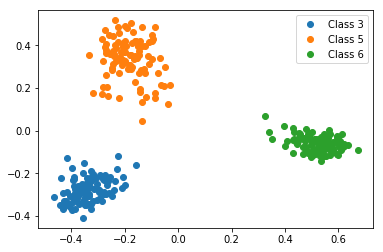

In [5]:
plt.figure()
for i in np.unique(lbls):
    idx = np.where(lbls == i)[0]
    plt.plot(embed[idx, 0], embed[idx, 1], 'o', label='Class %i' % i)
plt.legend()
plt.show()

##### 3 centers

Kmeans terminated after 100 iterations 

Final cluster distortion: 864.7676


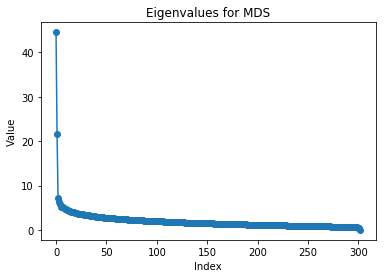

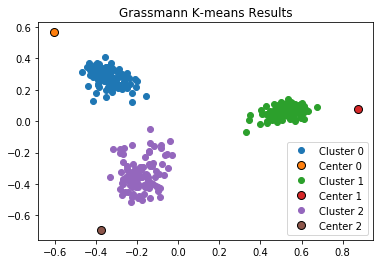

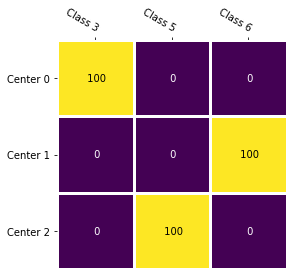

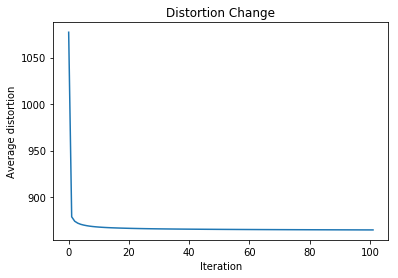

In [6]:
kmeans = gr_kmeans.gr_kmeans(verbosity=0)
kmeans_centers, kmeans_labels = kmeans.fit(sub, true_labels=lbls, center_count=3, plot_results=True, eigplot=True,
                                          show_cluster_data=True, numits=100)

LBG terminated after 3 iterations 

Final cluster distortion: 855.9889


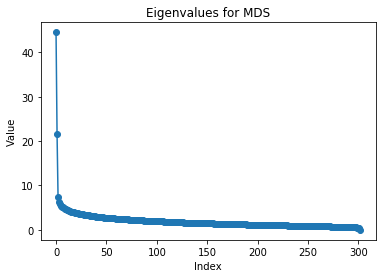

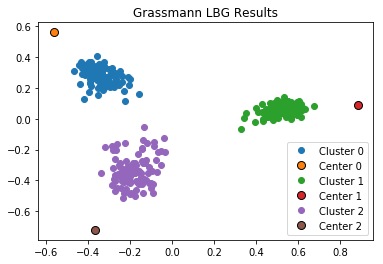

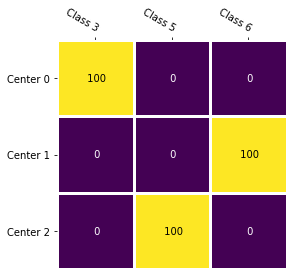

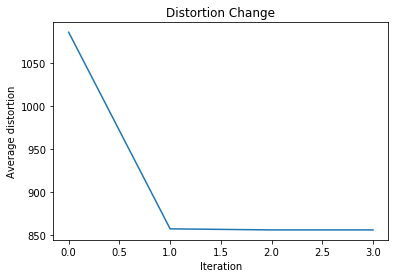

In [7]:
lbg = gr_lbg.gr_lbg(verbosity=0)
lbg_centers, lbg_labels = lbg.fit(sub, true_labels=lbls, center_count=3, plot_results=True, eigplot=True,
                                 show_cluster_data=True, numits=100)

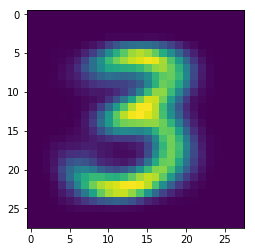

In [8]:
fig, ax = plt.subplots()
im = ax.imshow(lbg_centers[0][:,0].reshape((28,28)))

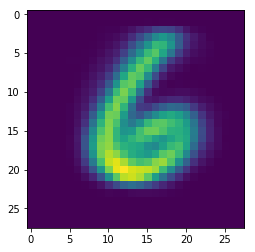

In [9]:
fig, ax = plt.subplots()
im = ax.imshow(lbg_centers[1][:,0].reshape((28,28)))

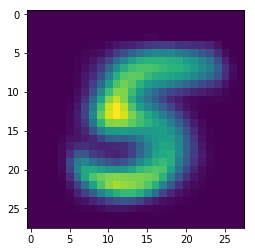

In [10]:
fig, ax = plt.subplots()
im = ax.imshow(lbg_centers[2][:,0].reshape((28,28)))

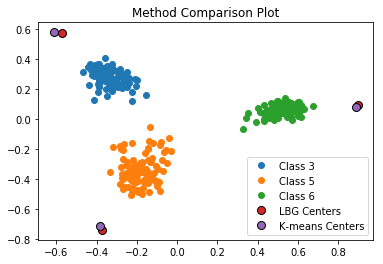

In [11]:
plots.method_comparison_plot(sub, lbls, kmeans_centers, lbg_centers)

##### 6 centers

Kmeans terminated after 100 iterations 

Final cluster distortion: 850.8439


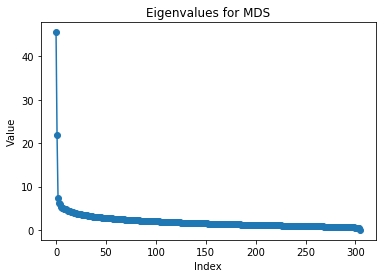

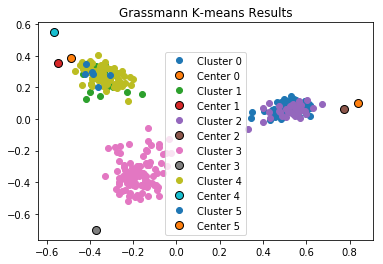

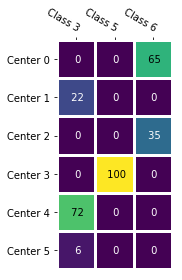

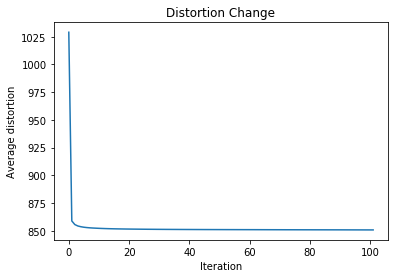

In [12]:
kmeans = gr_kmeans.gr_kmeans(verbosity=0)
kmeans_centers, kmeans_labels = kmeans.fit(sub, true_labels=lbls, center_count=6, plot_results=True, eigplot=True,
                                          show_cluster_data=True, numits=100)

LBG terminated after 5 iterations 

Final cluster distortion: 834.0976


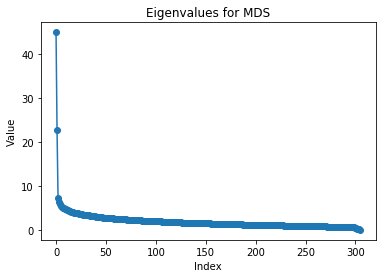

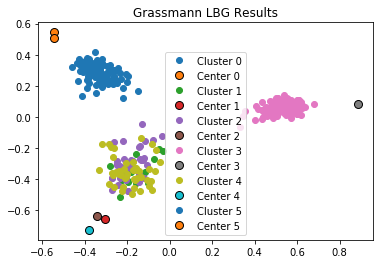

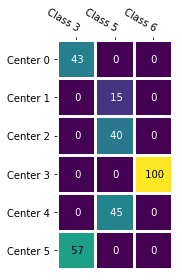

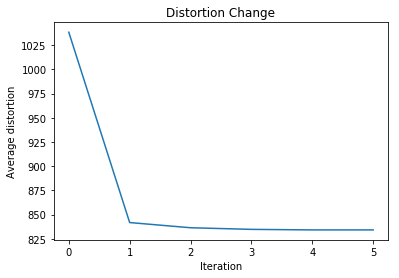

In [13]:
lbg = gr_lbg.gr_lbg(verbosity=0)
lbg_centers, lbg_labels = lbg.fit(sub, true_labels=lbls, center_count=6, plot_results=True, eigplot=True,
                                 show_cluster_data=True, numits=100)

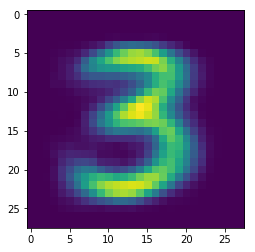

In [14]:
fig, ax = plt.subplots()
im = ax.imshow(lbg_centers[0][:,0].reshape((28,28)))

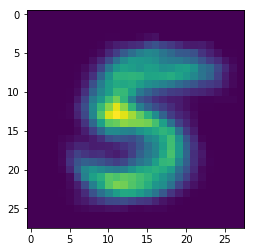

In [15]:
fig, ax = plt.subplots()
im = ax.imshow(lbg_centers[1][:,0].reshape((28,28)))

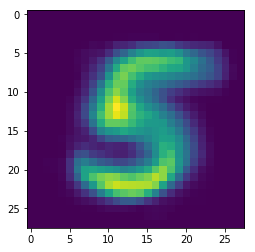

In [16]:
fig, ax = plt.subplots()
im = ax.imshow(lbg_centers[2][:,0].reshape((28,28)))

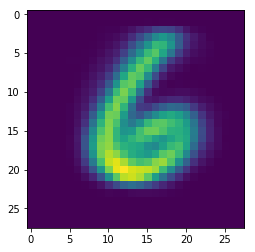

In [17]:
fig, ax = plt.subplots()
im = ax.imshow(lbg_centers[3][:,0].reshape((28,28)))

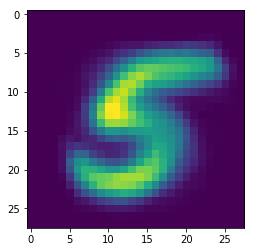

In [18]:
fig, ax = plt.subplots()
im = ax.imshow(lbg_centers[4][:,0].reshape((28,28)))

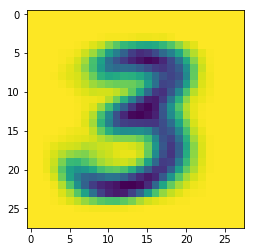

In [19]:
fig, ax = plt.subplots()
im = ax.imshow(lbg_centers[5][:,0].reshape((28,28)))

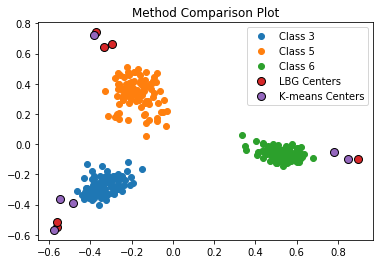

In [20]:
plots.method_comparison_plot(sub, lbls, kmeans_centers, lbg_centers)